# EDA - 2

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')

#### Flight Price:

Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the
dataset have?

Ans. Solution using python is as follows:

In [35]:
flights = pd.read_excel('flight_price.xlsx')
dim = flights.shape
row = dim[0]
col = dim[1]
print(f'The dimensions of flight price dataset is {dim}')
print(f'Number of rows : {row}')
print(f'Number of columns : {col}')

The dimensions of flight price dataset is (10683, 11)
Number of rows : 10683
Number of columns : 11


Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the
distribution.

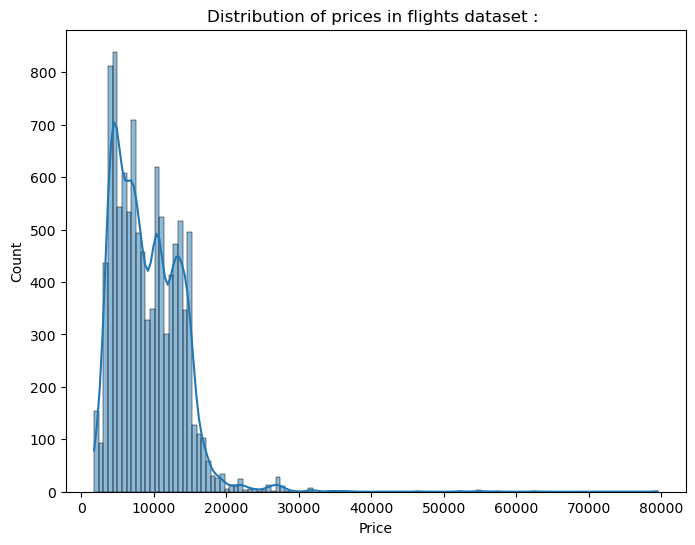

In [4]:
plt.figure(figsize=(8,6))
sns.histplot(flights['Price'], kde=True)
plt.title('Distribution of prices in flights dataset : ')
plt.show()

Q3. What is the range of prices in the dataset? What is the minimum and maximum price?

Ans. Solution using python is as follows:

In [4]:
min_price, max_price = np.quantile(flights['Price'], q=[0,1])
print(f'Range of prices in dataset : {max_price-min_price}')
print(f'Minimumm price : {min_price}')
print(f'Maximum price : {max_price}')

Range of prices in dataset : 77753
Minimumm price : 1759
Maximum price : 79512


This information can also be obtained by using the describe() method specifically on price column, as shown:

In [5]:
flights['Price'].describe()

count    10683.000000
mean      9087.064121
std       4611.359167
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64

Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different
airlines.

Ans. Solution using python is as shown:

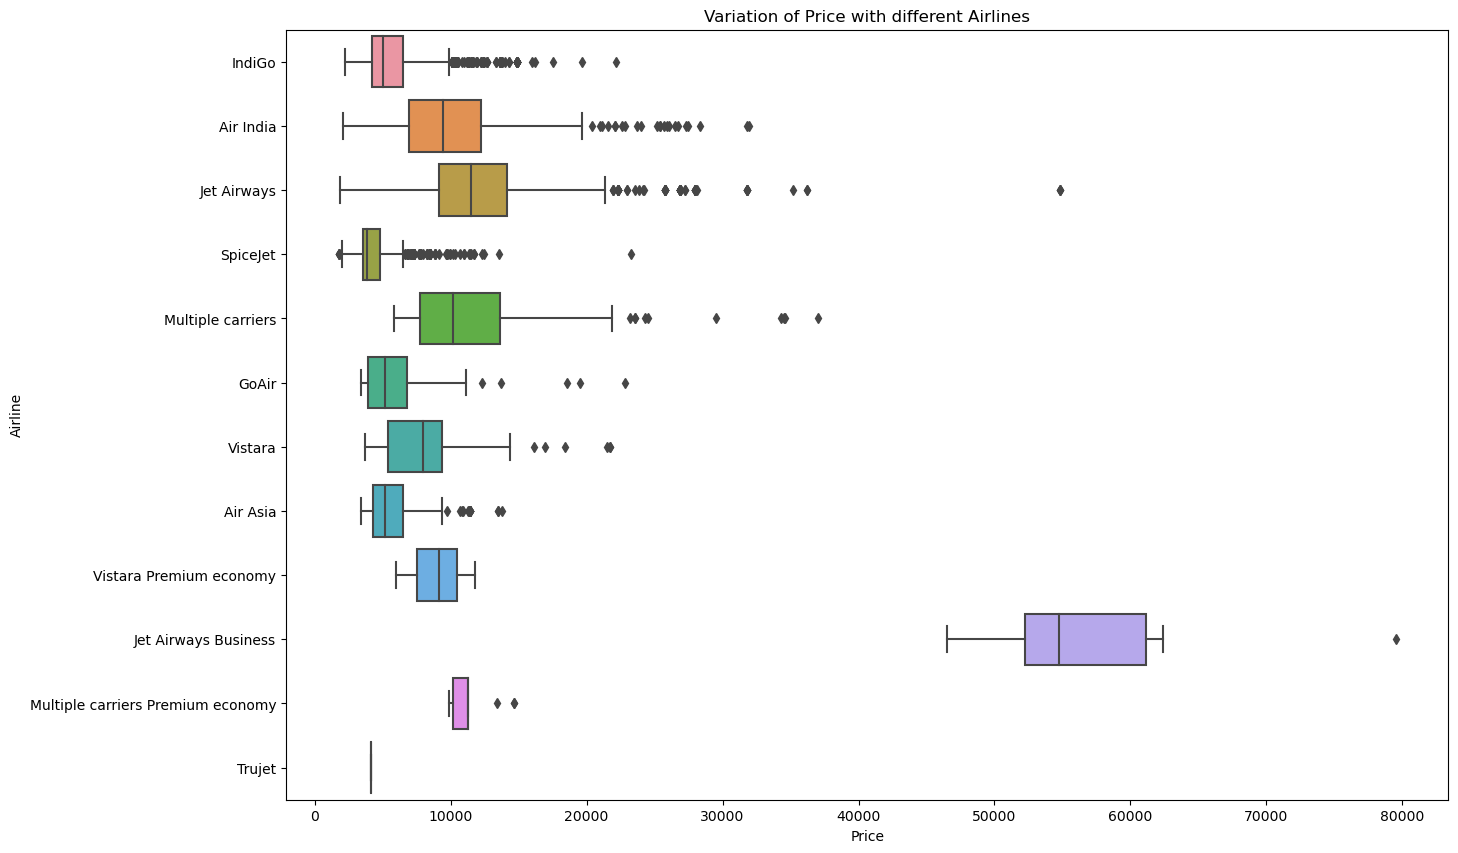

In [12]:
plt.figure(figsize=(15,10))
sns.boxplot(data=flights, y='Airline', x='Price')
plt.title('Variation of Price with different Airlines')
plt.show()


Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how
they may impact your analysis.

Ans. To identify outliers, we plot a Boxplot of price feature as shown below.

We see that there are many outliers. These 

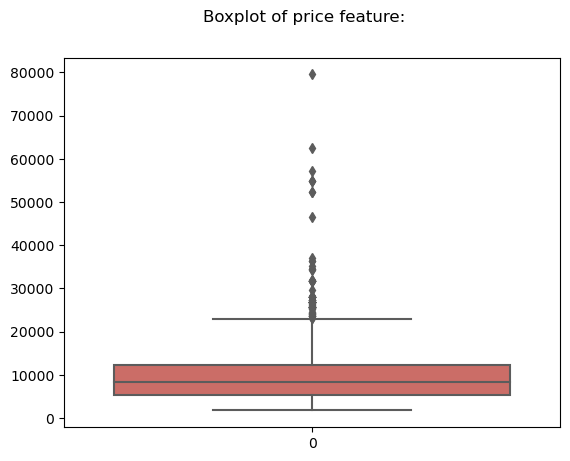

In [13]:
plt.suptitle('Boxplot of price feature:')
sns.boxplot(flights['Price'])
plt.show()

Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset to identify the peak travel season. What features would you analyze to identify the peak season, and how would you present your findings to your boss?

Ans. For identifying the peak travel season, we can analyse the distribution of flights with respect to month. For representing our findings, we can make use of appropriate plots such as countplot. The Solution is as shown using python:

Date of journey is in string format, so first we convert it to date-time using pandas and then extract the month, then we can plot the required graphs using seaborn:

In [14]:
#converting to date-time
flights['Date_of_Journey'] = pd.to_datetime( flights['Date_of_Journey'])

#creating the month column
flights['Month'] = flights['Date_of_Journey'].dt.month_name()

print('Thus our month column is:')
flights[['Month']].head()

Thus our month column is:


,Month
0,March
1,January
2,September
3,December
4,January


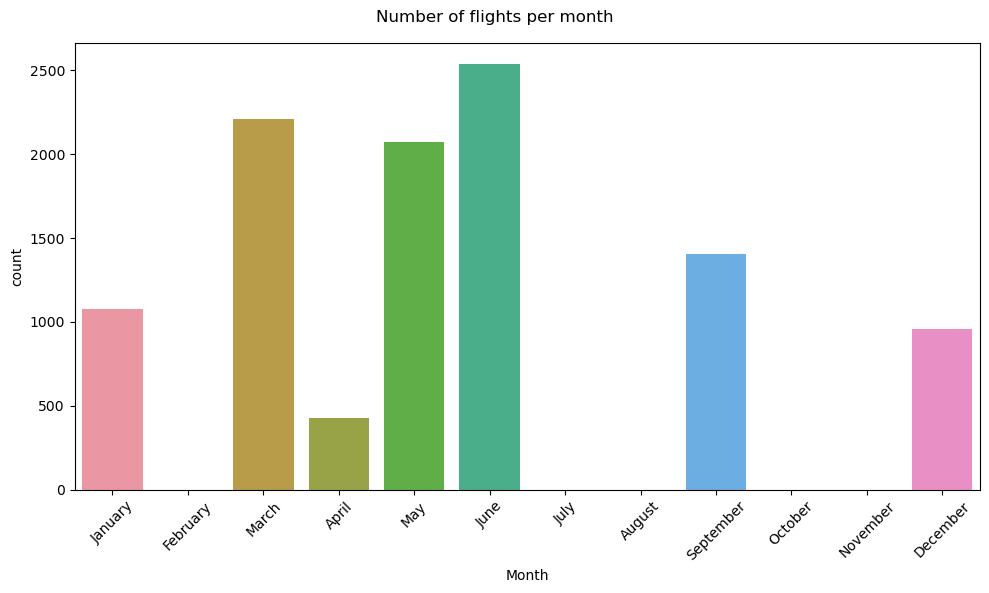

In [15]:
plt.figure(figsize=(10,6))

sns.set_palette('hls')
sns.countplot(x=flights['Month'], order=['January','February','March','April','May','June','July','August','September','October','November','December'])
plt.suptitle('Number of flights per month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### INSIGHTS:
- The peak season of flights is May-June. This can be due to people travelling during summer vacation in May-June.
- March is also close to peak season. Final exams of schools and colleges usually end in march, so it may be due to students travelling after exams. 
- The peak in September can be due to the fact that there are many festivals around that time. It is also the time when half-yearly/mid-term exams usually end.
- The collective peak in January and December can be due to people travelling in their winter vacation.

Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight Price dataset to identify any trends in flight prices. What features would you analyze to identify these trends, and what visualizations would you use to present your findings to your team?

Ans. We can effectively use lineplot to analyse any trends. Solution using Python is as follows:

In [16]:
#some preprocessing
flights['Month_num']=pd.to_datetime(flights['Date_of_Journey']).dt.month
flights['Dep Hour']=pd.to_datetime(flights['Dep_Time']).dt.hour
flights['Arrival Hour']=pd.to_datetime(flights['Arrival_Time']).dt.hour

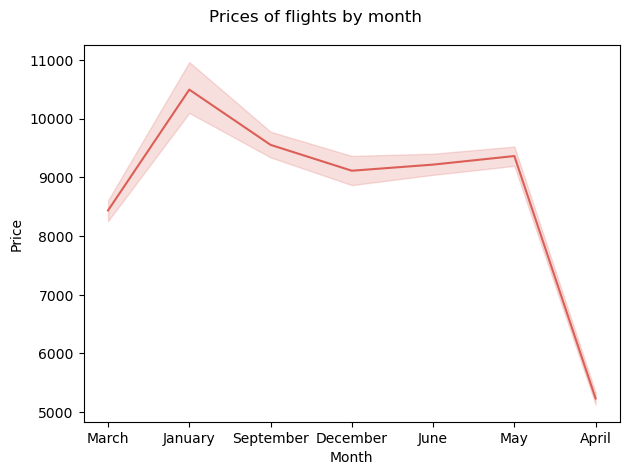

In [20]:
sns.lineplot(x=flights['Month'], y=flights['Price'])
plt.suptitle('Prices of flights by month')
plt.tight_layout()
plt.show()

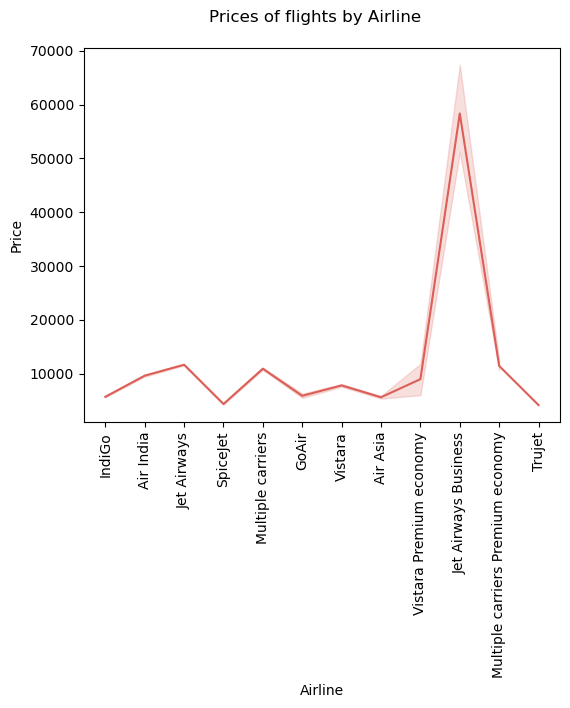

In [21]:
sns.lineplot(x=flights['Airline'], y=flights['Price'])
plt.suptitle('Prices of flights by Airline')
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

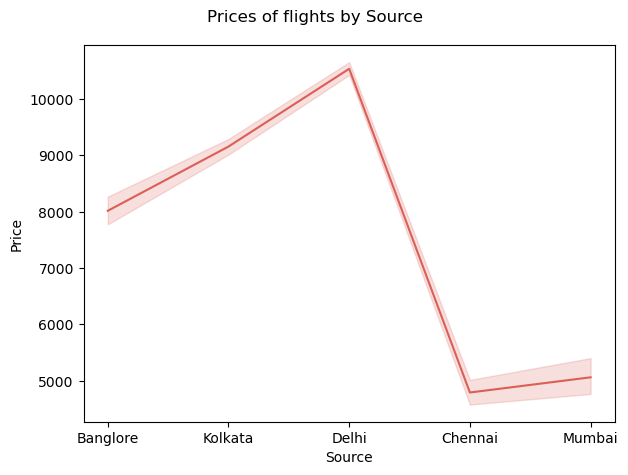

In [22]:
sns.lineplot(x=flights['Source'], y=flights['Price'])
plt.suptitle('Prices of flights by Source')
plt.tight_layout()
plt.show()

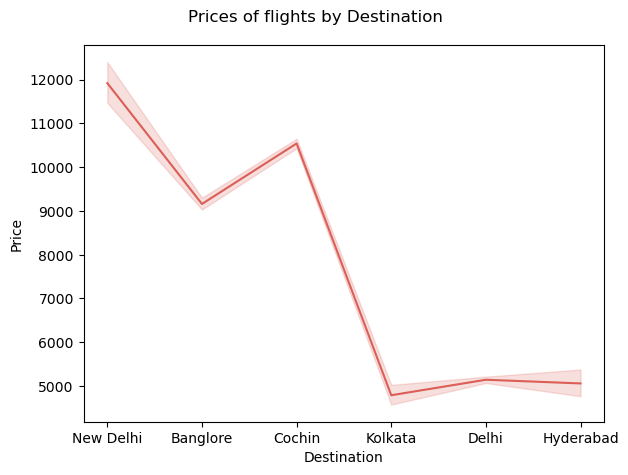

In [23]:
sns.lineplot(x=flights['Destination'], y=flights['Price'])
plt.suptitle('Prices of flights by Destination')
plt.tight_layout()
plt.show()

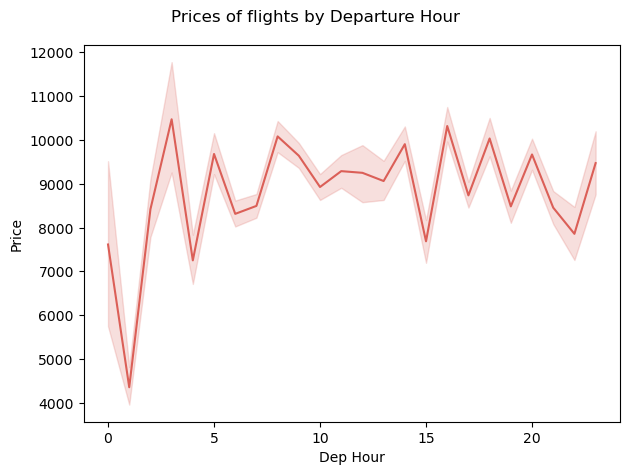

In [24]:
sns.lineplot(x=flights['Dep Hour'], y=flights['Price'])
plt.suptitle('Prices of flights by Departure Hour')
plt.tight_layout()
plt.show()

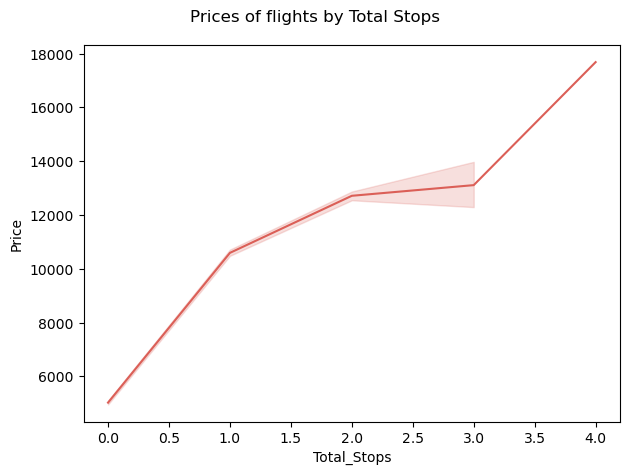

In [25]:
sns.lineplot(x=flights['Total_Stops'], y=flights['Price'])
plt.suptitle('Prices of flights by Total Stops')
plt.tight_layout()
plt.show()

#### Insights:
From the above lineplots, we find that:

- The flight prices are highest in January and lowest in April
- The Jet Airways Business is the most expensive Airline
- When Delhi is Source, flight price is more and when Chennai is source, flight price is least
- Flight prices are highest when New Delhi is Destination and lowest when destination is Kolkata
- The flights which depart around 3-4 am have more prices
- Flights which depart at around 1-2 am have least prices
- Flights which arrive at 5 am early morning have highest price
- As the total number of stops increases, the Flight price also increases.

Q8. You are a data scientist working for an airline company, and you have been asked to analyze the Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to identify these factors, and how would you present your findings to the management team?

Ans. Factors which can affect the prices are:
- Duration- If duration is more, the flight price will be more
- Number of Stops- The number of stops can also affect the price
- Airline- different airlines can have different ticket prices


In [34]:
#some preprocessing steps:

flights['Total_Stops']=flights['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4, np.nan:1})

flights[['Airline','Total_Stops','Price']].head()

,Airline,Total_Stops,Price
0,IndiGo,1,3897
1,Air India,1,7662
2,Jet Airways,1,13882
3,IndiGo,1,6218
4,IndiGo,1,13302


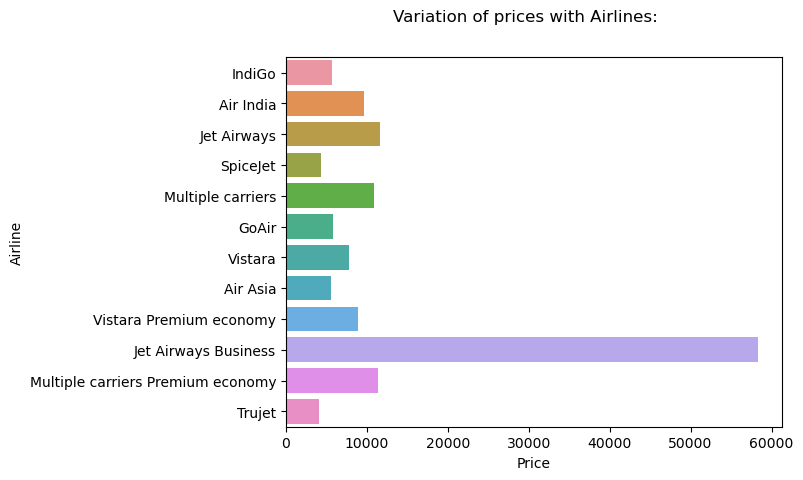

In [33]:
plt.suptitle('Variation of prices with Airlines:')
sns.barplot(data=flights, y='Airline', x='Price', errorbar=None)
plt.show()

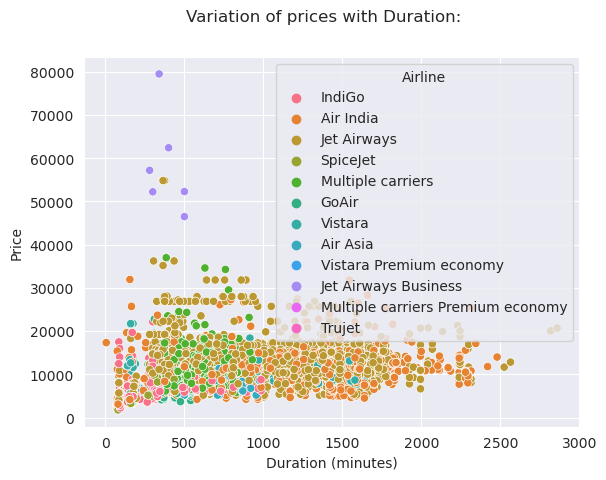

In [42]:
plt.suptitle('Variation of prices with Duration:')
sns.scatterplot(data=flights, x='Duration (minutes)', y='Price', hue='Airline')
plt.show()

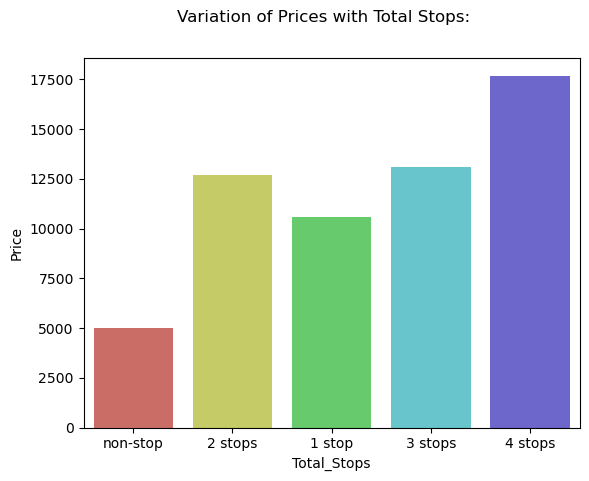

In [37]:
plt.suptitle('Variation of Prices with Total Stops:')
sns.barplot(data=flights, x='Total_Stops', y='Price', errorbar=None)
plt.show()

#### Insights:

- Airline- The Price range also depends upon the Airline company. Jeta Airways Business has the highest price of ticket
- Duration- There is no significant relation between Prices and Duration
- Number of Stops- As the number of stops increases, the price also increases


#### Google Playstore:

Q9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does
the dataset have?

In [38]:
playstore=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
print('The Playstore Data is loaded :')
playstore.head()

The Playstore Data is loaded :


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [39]:
dim = playstore.shape
print(f'The dimensions of flight price dataset is {dim}')
print(f'Number of rows : {dim[0]}')
print(f'Number of columns : {dim[1]}')

The dimensions of flight price dataset is (10841, 13)
Number of rows : 10841
Number of columns : 13


Q10. How does the rating of apps vary by category? Create a boxplot to compare the ratings of different
app categories.

Ans. Solution using python is as follows:

In [40]:
#some preprocessing steps
playstore.drop_duplicates(inplace=True)
playstore['Rating'].fillna(playstore['Rating'].median(), inplace=True)
upper=1.5*np.quantile(playstore['Rating'], q=0.75)
playstore=playstore.drop(index=playstore[playstore['Rating']>=upper].index)
playstore.reset_index(inplace=True)

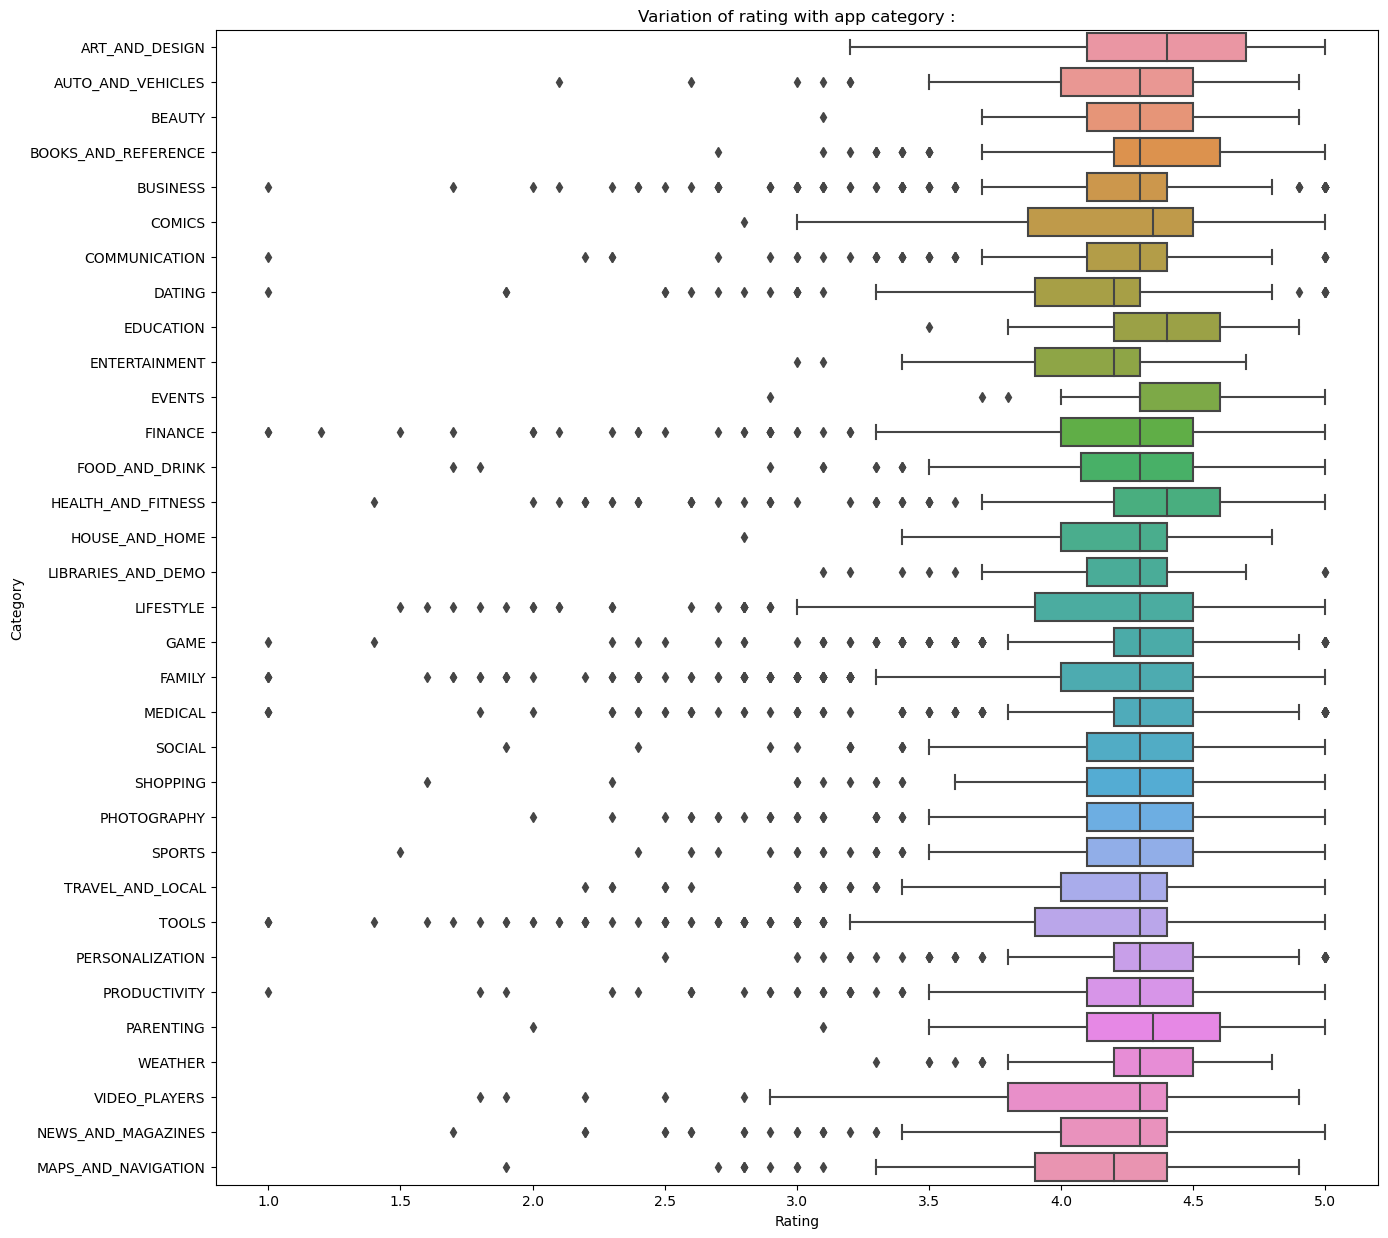

In [41]:
plt.figure(figsize=(15,15))
plt.title('Variation of rating with app category :')
sns.boxplot(y=playstore['Category'], x=playstore['Rating'])
plt.show()

Q11. Are there any missing values in the dataset? Identify any missing values and describe how they may
impact your analysis.

Ans. Since we modified Dataset for a previews question, let us load it again:

In [42]:
playstore=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
print('The Playstore Data is loaded :')
playstore.head()

The Playstore Data is loaded :


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [43]:
null_list=playstore.isna().sum()[playstore.isna().sum()>0]
for i in range(len(null_list)):
    print(f'The number of missing values in {null_list.index[i]} columns is : {null_list[i]}')

The number of missing values in Rating columns is : 1474
The number of missing values in Type columns is : 1
The number of missing values in Content Rating columns is : 1
The number of missing values in Current Ver columns is : 8
The number of missing values in Android Ver columns is : 3


Thus the above code prints the number of missing values in different columns.

Missing values can impact our data analysis as we may fail to capture real insights and we may fail to get the true trends. For example, there are 1474 missing values in the raing column, this can affect the mean and median rating. This loss of data can also lead to error in traing our model.

Q12. What is the relationship between the size of an app and its rating? Create a scatter plot to visualize
the relationship.

Ans. First we need to convert Size column into numeric type. The solution using python is as follows:

In [48]:
df_copy=playstore.copy()
df_copy.drop(df_copy.index[10472], inplace=True)
df_copy.reset_index(drop=True,inplace=True)

In [49]:
def convert_size_to_kb(size_str):
    if size_str == 'varies with device':
        return np.nan
    
    size_str = size_str.replace('M', 'e3').replace('k', '')
    try:
        return float(eval(size_str))
    except:
        return np.nan

In [50]:
df_copy['Size']=df_copy['Size'].apply(convert_size_to_kb)


<Axes: xlabel='Rating', ylabel='Size'>

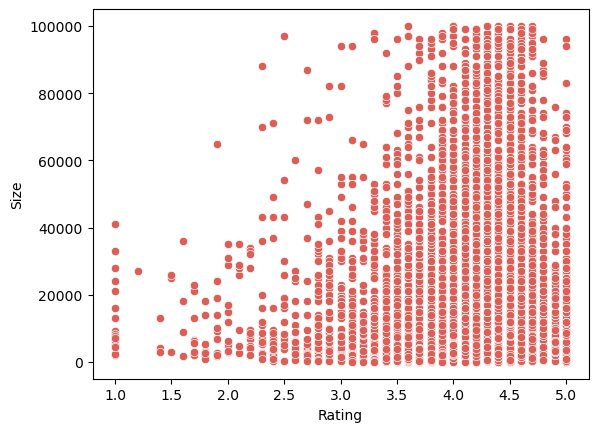

In [51]:
sns.scatterplot(data=df_copy, y='Size', x='Rating')

Q13. How does the type of app affect its price? Create a bar chart to compare average prices by app type.

Ans. Solution using Python is as follows:

In [52]:
df_copy['Price']=df_copy['Price'].str.replace('$','').astype(float)

In [53]:
df_2=df_copy.groupby(['Category'])['Price'].mean().sort_values(ascending=False).reset_index()
df_2.head(10)

,Category,Price
0,FINANCE,7.925765
1,LIFESTYLE,6.180288
2,MEDICAL,3.110065
3,EVENTS,1.718594
4,FAMILY,1.234675
5,PRODUCTIVITY,0.591816
6,BOOKS_AND_REFERENCE,0.518485
7,BUSINESS,0.402761
8,PHOTOGRAPHY,0.400627
9,WEATHER,0.395366


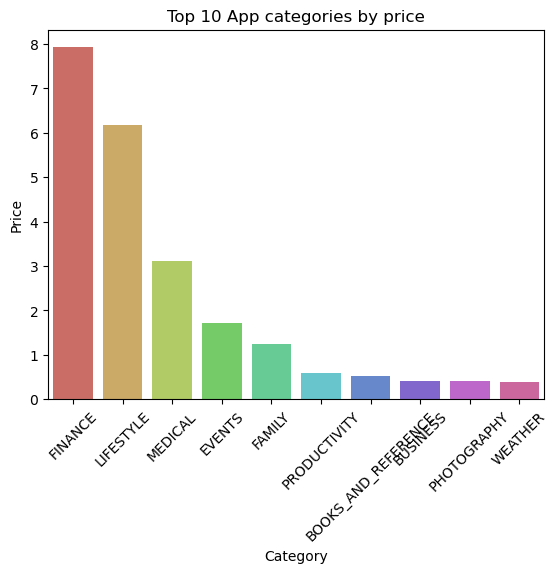

In [54]:
sns.barplot(y='Price', x ='Category', data = df_2[:10],palette='hls')
plt.title('Top 10 App categories by price')
plt.xticks(rotation=45)
plt.show()

#### Insights: 
We see that top 5 paid App categories are:

0. FINANCE with mean price 7.925765
1. LIFESTYLE with mean price 6.180288
2. MEDICAL with mean price 3.110065
3. EVENTS with mean price 1.718594
4. FAMILY with mean price 1.234675


Q14. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps
with the highest number of installs.

Ans. Solution using Python is as follows:

In [55]:
df_copy['Installs']=df_copy['Installs'].str.replace('+','').str.replace(',','').astype('int')
app_installs=df_copy.groupby(['App'])['Installs'].sum().sort_values(ascending=False)
df_app_installs=pd.DataFrame(app_installs)

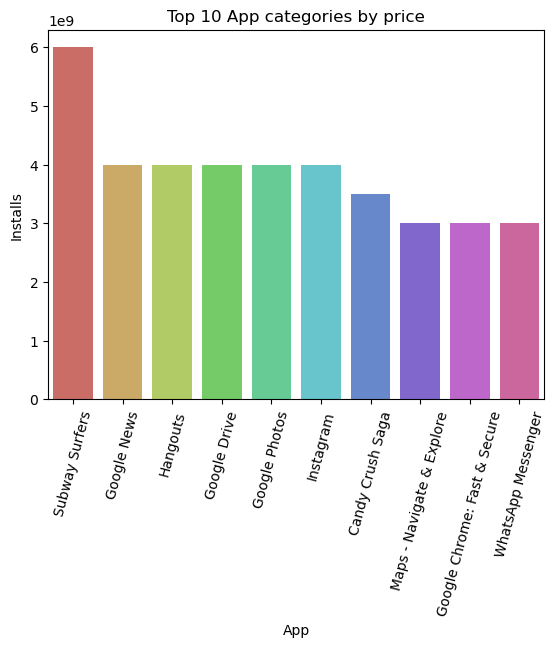

In [56]:
sns.barplot(x=df_app_installs.index[:10], y ='Installs', data =df_app_installs[:10],palette='hls')
plt.title('Top 10 App categories by price')
plt.xticks(rotation=75)
plt.show()

Q15. A company wants to launch a new app on the Google Playstore and has asked you to analyze the
Google Playstore dataset to identify the most popular app categories. How would you approach this
task, and what features would you analyze to make recommendations to the company?

Ans. To identify the most popular app categories, we need to analyze the Rating, the number of installs with respect to category of apps.
- First we will use groupby function to group on basis of category of app
- then, we can find the total number of installs or mean ratings by using sum or mean function.
- the values obtained can be sorted in descending order. 
- we can the extract the top 10 records or plot them

Solution using python as follows:

In [57]:
avg_rating=df_copy.groupby('Category')['Rating'].mean().sort_values(ascending=False)[:10]
df_avg_rating = pd.DataFrame(avg_rating)


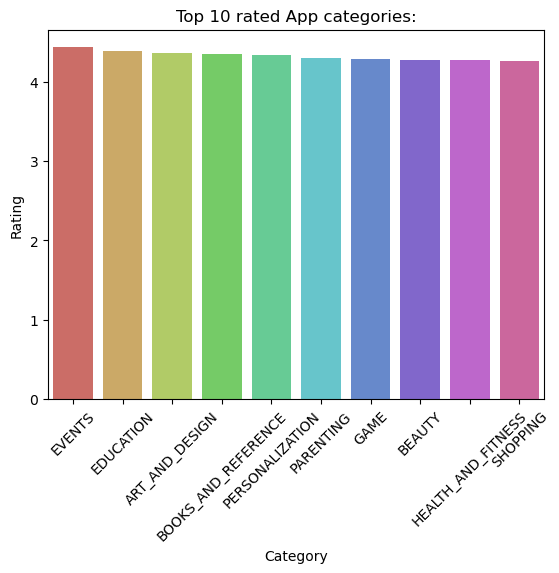

In [58]:
sns.barplot(x=df_avg_rating.index, y ='Rating', data =df_avg_rating[:10],palette='hls')
plt.title('Top 10 rated App categories:')
plt.xticks(rotation=45)
plt.show()

In [59]:
cat_installs=df_copy.groupby(['Category'])['Installs'].sum().sort_values(ascending=False)[:10]

df_cat_installs=pd.DataFrame(cat_installs)


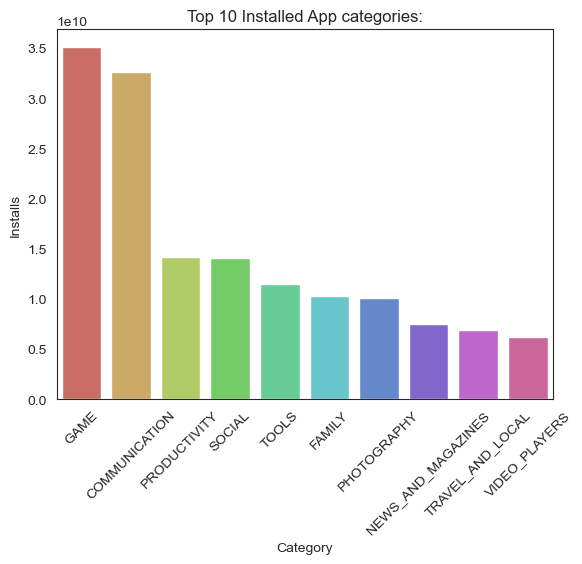

In [60]:

sns.set_style('white')
sns.barplot(x=df_cat_installs.index, y ='Installs', data =df_cat_installs,palette='hls')
plt.title('Top 10 Installed App categories:')
plt.xticks(rotation=45)
plt.show()

#### Insights:
We see that GAME and COMMUNICATION are the most popular app categories by number of installations.

Q16. A mobile app development company wants to analyze the Google Playstore dataset to identify the
most successful app developers. What features would you analyze to make recommendations to the
company, and what data visualizations would you use to present your findings?

Ans. The playstore data provided has no feature regarding the App Developer.

But if such information is present, then we can analyse features such as Rating, Installations to identify the most successful app developers. 

We can use Bar plot to efficiently present our findings.

Solution using Random Data:

In [61]:

import random

# Function to generate random app name
def generate_app_name():
    words = ['Awesome', 'Fantastic', 'Innovative', 'Super', 'Best', 'Cool', 'Amazing', 'Ultimate']
    suffixes = ['App', 'Pro', 'Lite', 'Plus', 'Max', 'Prime']
    return random.choice(words) + ' ' + random.choice(suffixes)

# Function to generate random developer name
def generate_developer():
    adjectives = ['Tech', 'Software', 'Games', 'Solutions', 'Studios', 'Apps', 'Innovations']
    nouns = ['Corp', 'Ltd', 'Inc', 'Co', 'Group', 'Systems', 'Developers']
    return random.choice(adjectives) + ' ' + random.choice(nouns)

# Generate sample data
num_entries = 50
data = []

for _ in range(num_entries):
    app_name = generate_app_name()
    developer = generate_developer()
    rating = round(random.uniform(1.0, 5.0), 1)
    installations = random.randint(10000, 10000000)
    data.append((app_name, developer, rating, installations))

# Create a Pandas DataFrame
columns = ["App Name", "Developer", "Rating", "Installations"]
df = pd.DataFrame(data, columns=columns)

df.head()


,App Name,Developer,Rating,Installations
0,Cool Prime,Apps Ltd,1.9,4146816
1,Super Pro,Tech Group,1.3,2164812
2,Ultimate Plus,Tech Co,4.7,4511734
3,Best Pro,Games Corp,4.2,2944207
4,Cool Prime,Studios Group,2.2,1807106


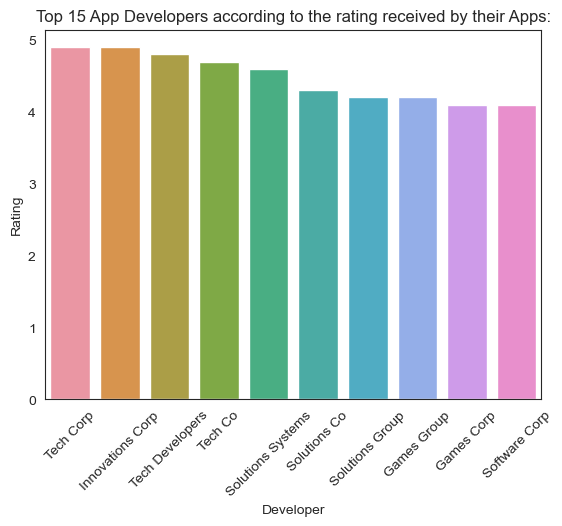

In [62]:
dev_rating = df.groupby('Developer')['Rating'].mean().sort_values(ascending=False)

sns.set_style('white')
sns.barplot(x=dev_rating.index[:10], y=dev_rating[:10])
plt.title('Top 15 App Developers according to the rating received by their Apps:')
plt.xticks(rotation=45)
plt.show()

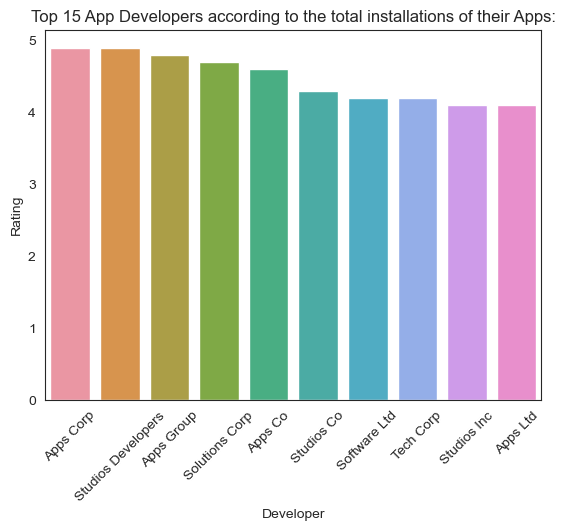

In [63]:
dev_installs = df.groupby('Developer')['Installations'].sum().sort_values(ascending=False)

sns.barplot(x=dev_installs.index[:10], y=dev_rating[:10])
plt.title('Top 15 App Developers according to the total installations of their Apps:')
plt.xticks(rotation=45)
plt.show()

Q17. A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to
launch a new app. What features would you analyze to make recommendations to the company, and
what data visualizations would you use to present your findings?

Ans. To find the best time to launch an app, we need to analyze features such as number of installations, month and rating. 

In [64]:
df_copy['Last Updated Month']=pd.to_datetime(df_copy['Last Updated']).dt.month_name()

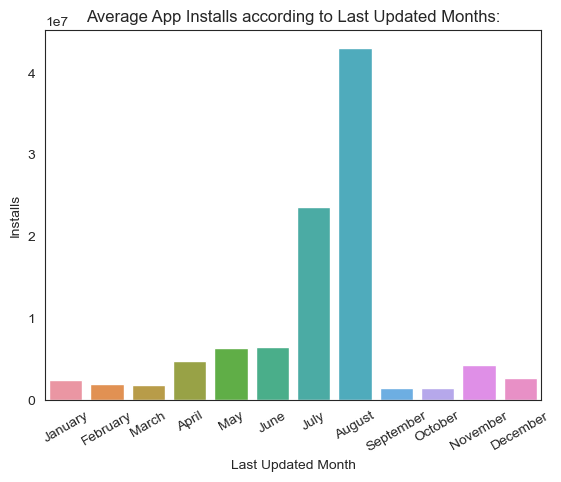

In [65]:
sns.barplot(data=df_copy, x='Last Updated Month', y='Installs', errorbar=None,
            order=['January','February','March','April','May','June','July','August','September','October','November','December'])
plt.title('Average App Installs according to Last Updated Months:')
plt.xticks(rotation=30)
plt.show()

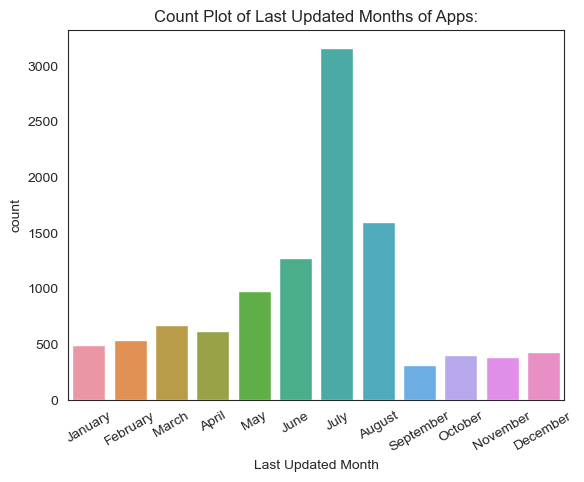

In [66]:
sns.countplot(data=df_copy, x='Last Updated Month',
             order=['January','February','March','April','May','June','July','August','September','October','November','December'])
plt.title('Count Plot of Last Updated Months of Apps:')
plt.xticks(rotation=30)
plt.show()

#### Insights:
From the above visualisations, we can conclude that, the Apps that are Updated in July-August have most number of installs and highest rating. So, we can say that July-August is the best time to launch a new App.